In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime

/home/ben/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('../data/preprocessed.csv',parse_dates=True)
data['time'] = data['time'].apply(datetime.datetime.fromisoformat)

In [4]:
def get_month(datetime_obj):
    return datetime_obj.month

Plotting the first 2 weeks of energy data as timeseries

/home/ben/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


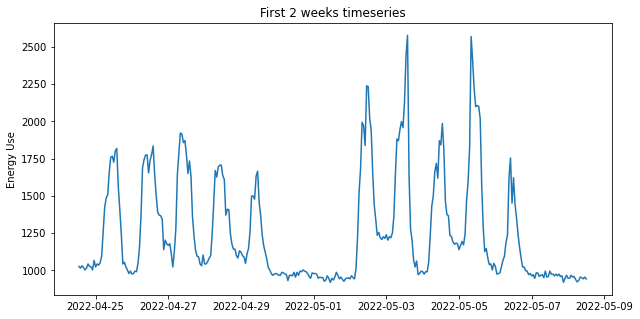

In [5]:
#First two weeks of data
two_weeks_df = data[data['time'] < (data['time'].iloc[0]+ datetime.timedelta(weeks=2))]
#fig = two_weeks_df.plot(x='time',y=['energy'])

#fig size
plt.rcParams["figure.figsize"] = (10,5)
fig = plt.plot(two_weeks_df.time,two_weeks_df.energy)
plt.title("First 2 weeks timeseries")
plt.ylabel("Energy Use")
plt.savefig('../plots/first_2_weeks_energy.png')

Plotting random 2 weeks of data

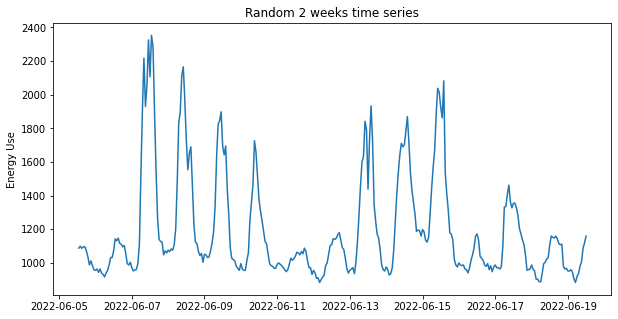

In [6]:
#plotting random 2 weeks of data
week_number = 6

two_weeks_df = data[(data['time'] >= (data['time'].iloc[0] + datetime.timedelta(weeks=week_number))) &  (data['time'] < (data['time'].iloc[0] + datetime.timedelta(weeks=week_number+2)))]
#two_weeks_df.plot(x='time',y=['energy'])

plt.rcParams["figure.figsize"] = (10,5)
fig = plt.plot(two_weeks_df.time,two_weeks_df.energy)
plt.title("Random 2 weeks time series")
plt.ylabel("Energy Use")
plt.savefig('../plots/random_2_weeks_energy.png')

#### Plotting Energy Consumption for the whole period

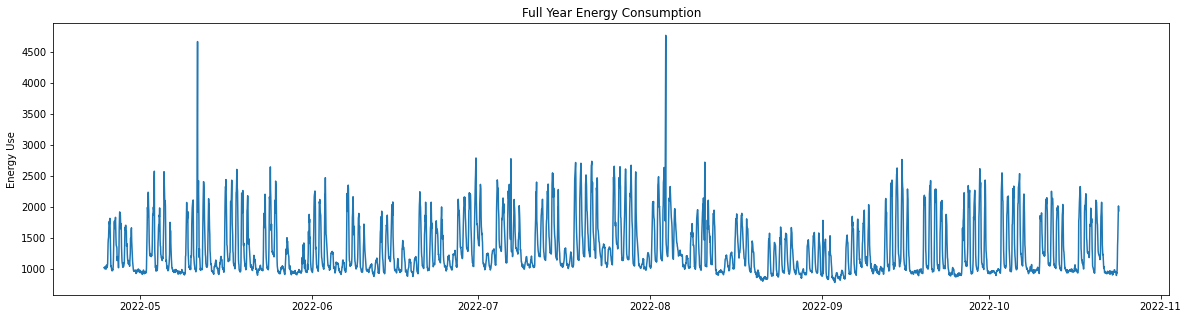

In [7]:
plt.rcParams["figure.figsize"] = (20,5)
fig = plt.plot(data.time,data.energy)
plt.title("Full Year Energy Consumption")
plt.ylabel("Energy Use")
plt.savefig('../plots/full_year_energy.png')

In [8]:
data

,time,energy,energy_cumulative,energy_lag,glob_irrad_in_diffuse,glob_irrad_total_disc,dew_point,enth,rel_hum,temp
0,2022-04-24 13:00:00,1027.0,6207130.0,6206103.0,285.451531,285.451531,9.591667,36.433333,59.4,17.333333
1,2022-04-24 14:00:00,1015.0,6208145.0,6207130.0,231.998159,231.998159,9.682353,37.560000,55.4,18.493750
2,2022-04-24 15:00:00,1031.0,6209176.0,6208145.0,119.028416,119.028416,7.150000,33.300000,51.4,17.000000
3,2022-04-24 16:00:00,1019.0,6210195.0,6209176.0,101.904795,101.904795,5.650000,31.300000,48.4,16.950000
4,2022-04-24 17:00:00,1003.0,6211198.0,6210195.0,54.970074,54.970074,4.700000,29.800000,46.4,16.033333
...,...,...,...,...,...,...,...,...,...,...
4380,2022-10-24 08:00:00,1706.0,11954317.0,11952611.0,150.080133,150.080133,11.640000,36.233333,NaN,14.475000
4381,2022-10-24 09:00:00,1886.0,11956203.0,11954317.0,192.674457,192.674457,12.855556,39.585714,NaN,15.728571
4382,2022-10-24 10:00:00,2018.0,11958221.0,11956203.0,246.684050,246.684050,15.509091,47.208333,80.9,18.522222
4383,2022-10-24 11:00:00,1938.0,11960159.0,11958221.0,119.853381,119.853381,15.240000,46.400000,77.9,19.150000


In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(date, temperature, color=COLOR_TEMPERATURE, lw=3)
ax2.plot(date, price, color=COLOR_PRICE, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (Celsius °)", color=COLOR_TEMPERATURE, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)

ax2.set_ylabel("Price ($)", color=COLOR_PRICE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_PRICE)

fig.suptitle("Temperature down, price up", fontsize=20)
fig.autofmt_xdate()

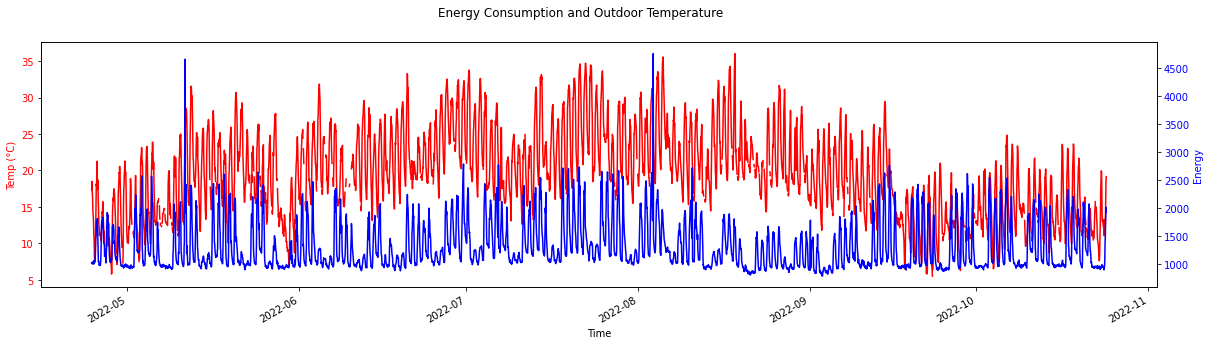

In [48]:

fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()
fig.autofmt_xdate()
fig.suptitle('Energy Consumption and Outdoor Temperature')
ax1.set_xlabel("Time")

ax1.set_ylabel('Temp (°C)', color='red')
ax1.plot(data.time, data.temp, color='red')
ax1.tick_params(axis="y", labelcolor='red')


ax2.set_ylabel("Energy",color='blue')
ax2.plot(data.time, data.energy, color='blue')
ax2.tick_params(axis="y", labelcolor='blue')

fig.savefig('../plots/energy_outdoor_temp.png')
